# Factors That Affect Uber Pickup Requests in New York City

From this research, we want to learn how will location, time, and weather condition factors affect Uber pickups specifically in New York City.

### Number 1.a: *Process*  - UNION Each Month's Data Into One Table Called "All_Data"

In [ ]:
%%bq query
SELECT * FROM `team-3-249220.team3.uber_raw_data_apr14` 
UNION DISTINCT
SELECT * FROM `team-3-249220.team3.uber_raw_data_may14`
UNION DISTINCT
SELECT * FROM `team-3-249220.team3.uber_law_data_jun14`
UNION DISTINCT
SELECT * FROM `team-3-249220.team3.uber_raw_data_jul14`
UNION DISTINCT
SELECT * FROM `team-3-249220.team3.uber_raw_data_aug14`
UNION DISTINCT
SELECT * FROM `team-3-249220.team3.uber_raw_data_sep14`

### Number 1.b: *Process*  - New York City Weather Raw Data

In [ ]:
%%bq query
SELECT  *
FROM `team-3-249220.team3.2014NewYorkCityWeather`

### Number 2: Top 10 Most Pickup Request Zones in New York City

In [32]:
%%bq query
SELECT
   ST_GeogPoint(Lon, Lat)  AS WKT,
   count(*) AS Num_Of_Pickups
FROM
  `team-3-249220.team3.All_Data` 
GROUP BY Lon, Lat
ORDER BY Num_Of_Pickups DESC
LIMIT 20

WKT,Num_Of_Pickups
POINT(-73.7819 40.6448),2255
POINT(-73.8625 40.7685),2228
POINT(-73.782 40.6448),2032
POINT(-73.7822 40.6449),1911
POINT(-73.8726 40.7741),1869
POINT(-73.8725 40.7741),1826
POINT(-73.8726 40.774),1797
POINT(-73.7821 40.6449),1729
POINT(-73.7818 40.6448),1724
POINT(-73.7821 40.6447),1546


We used the coordinates to find the locations with the highest Uber pickup request volume in New York City. And we found that most pickups were requested at John.F Kennedy Airport and LaGuardia Airport because millions of people travel in and out of these two airports. Besides these two zones, plenty of pickups were requested in the mid and lower Manhattan area, where a lot of attractions and museums are located.

### Number 3: Q2 and Q3 Monthly Uber Pickups in New York City

In [9]:
%%bq query
SELECT
   EXTRACT(Month FROM Date_Time)  AS Month,
   count(*) AS Num_Of_Trips
FROM
  `team-3-249220.team3.All_Data`
GROUP BY Month
ORDER BY Num_Of_Trips DESC

Month,Num_Of_Trips
9,1004099
8,813393
7,781969
6,653158
5,642360
4,556767


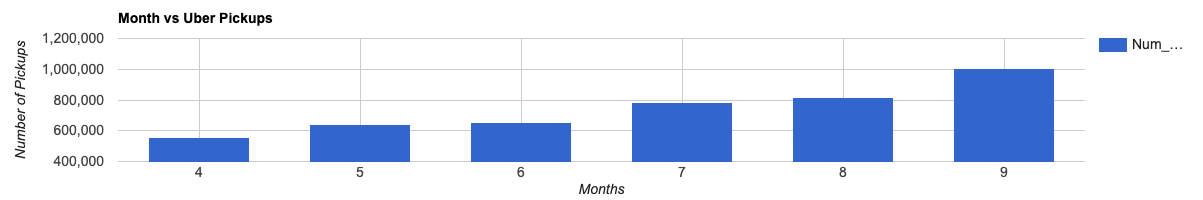

In [42]:
%%chart columns --data BusiestMonths
title: Month vs Uber Pickups
hAxis:
  title: Months
  ticks: [4,5,6,7,8,9]
vAxis:
  title: Number of Pickups

Base on this result, we found that the top 3 busiest months are July, August, and September and this may due to summer holiday, tourist season, and back-to-school season. 

### Number 4: Daily Uber Pickup Requests In A Week

In [13]:
%%bq query
SELECT
   EXTRACT(dayofweek FROM Date_Time) as DayOfWeek,
   count(*) AS Num_Of_Pickups
FROM
  `team-3-249220.team3.All_Data` 
GROUP BY DayOfWeek
ORDER BY Num_Of_Pickups DESC;

DayOfWeek,Num_Of_Pickups
5,741372
6,727532
4,683604
3,651753
7,634194
2,532133
1,481158


In [2]:
%%bq query -n DailyPickups
SELECT
   EXTRACT(dayofweek FROM Date_Time) as DayOfWeek,
   count(*) AS Num_Of_Pickups
FROM
  `team-3-249220.team3.All_Data` 
GROUP BY DayOfWeek
ORDER BY Num_Of_Pickups DESC;

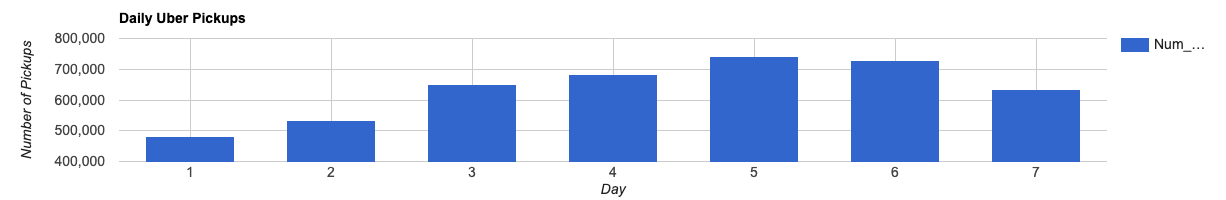

In [3]:
%%chart columns --data DailyPickups
title: Daily Uber Pickups
hAxis:
  title: Day
  ticks: [1,2,3,4,5,6,7]
vAxis:
  title: Number of Pickups

*Note*: 1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thursday, 6 = Friday, 7 = Saturday

Since it returns values in the range [1,7] with Sunday as the first day of the week, Thursday is the busiest day in a week with most Uber pickup requests. Based on this result, we would later compare each month’s top busiest weekday with it in order to determine whether the weekday is one of the factors that affect Uber pickup requests. 

### Number 5: Number of Uber Pickup Requests in Different Time Period of a Day

In [10]:
%%bq query
SELECT 
case when cast(Date_Time as Time) between '00:00:00' and '06:00:00' then 'Early_Morning_0-6'
when cast(Date_Time as Time) between '06:00:00' and '12:00:00' then 'Morning_6-12'
when cast(Date_Time as Time) between '12:00:00' and '18:00:00' then 'Afternoon_12-18'
else 'Evening_18-24' end as timeperiod,
count(*) as Number_Of_Pickups
FROM `team-3-249220.team3.All_Data`
GROUP BY timeperiod
ORDER BY Number_Of_Pickups ASC

timeperiod,Number_Of_Pickups
Early_Morning_0-6,398300
Morning_6-12,994923
Afternoon_12-18,1497580
Evening_18-24,1560943


In [6]:
%%bq query -n TimePeriod
SELECT 
case when cast(Date_Time as Time) between '00:00:00' and '06:00:00' then 'Early_Morning_0-6'
when cast(Date_Time as Time) between '06:00:00' and '12:00:00' then 'Morning_6-12'
when cast(Date_Time as Time) between '12:00:00' and '18:00:00' then 'Afternoon_12-18'
else 'Evening_18-24' end as timeperiod,
count(*) as Number_Of_Pickups
FROM `team-3-249220.team3.All_Data`
GROUP BY timeperiod
ORDER BY Number_Of_Pickups ASC

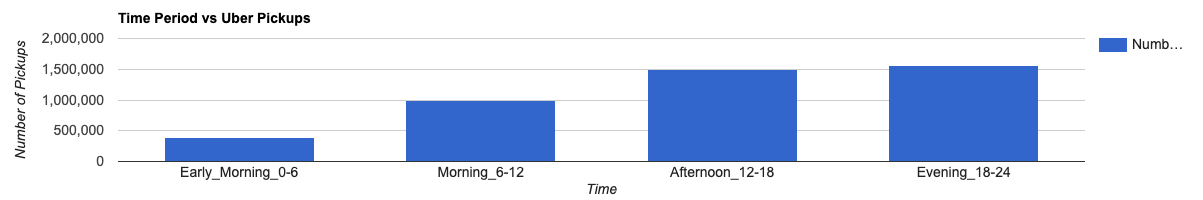

In [7]:
%%chart columns --data TimePeriod
title: Time Period vs Uber Pickups
vAxis:
  title: Number of Pickups
hAxis:
  title: Time

We separated a day into four time periods, which are early_morning, morning, afternoon, and evening, and counted each period’s number of pickups. From the result, we found that Uber drivers received the most requests during the evening period (18:00:00 -- 23:59:59). 

### Number 6: Hourly Pickup Requests in A Day

In [6]:
%%bq query
SELECT
   EXTRACT(hour FROM Date_Time) as hour,
   count(*) as number
FROM
  `team-3-249220.team3.All_Weather_Pickups` 
GROUP BY hour
ORDER BY number DESC

hour,number
18,637168
21,552366
15,541272
12,334722
17,330024
9,314632
16,307810
19,288836
6,281198
20,279309


We found that during a normal day, the most pickup requests happened between 3pm to 9 pm.  This is the period with high demand of uber. 

### Number 7: Top 5 Busiest Hour in a Day

In [8]:
%%bq query
SELECT weekDay, hour, number 
FROM (
  SELECT weekDay, hour, number,
  RANK() OVER ( PARTITION BY weekDay ORDER BY number desc ) AS rank
    FROM (SELECT extract(dayofweek from Date_Time) as weekDay,
          EXTRACT(hour FROM Date_Time) as hour,
          count(*) as number   
FROM  `team-3-249220.team3.All_Weather_Pickups` 
GROUP BY weekDay, hour
ORDER BY number desc)) where rank <=5

weekDay,hour,number
1,0,64550
1,15,61140
1,18,55452
1,21,47078
1,12,46938
2,18,72718
2,15,64402
2,21,56802
2,6,46570
2,9,43708


Based on this result, we can see that except Sunday has a large number of pickups appear at midnight, all other days’ top five largest pickups happened on 6 am, 3 pm, 5 pm, 6 pm, and 9 pm. Thus we can know that the time period we get from the previous query fits almost all 7 days. 

### Number 8: *Process*  - Convert All_Data table’s timestamp to hours

In [ ]:
%%bq query
SELECT
   TIMESTAMP_TRUNC(Date_Time, hour,'EST') as hour, *
FROM `team-3-249220.team3.All_Data`

We formatted the Date_Time from the All_Data table so that it can match with the datetime column’s format from the Weather table.

### Number 9: *Process* - Round 2014NewYorkCityWeather table’s timestamps to hours

In [ ]:
%%bq query
SELECT 
   TIMESTAMP_TRUNC(datetime, hour,'EST') as RoundedDate, * 
FROM 
   `team-3-249220.team3.2014NewYorkCityWeather`

This query helped to format and clear the data for later easier access to data. 

### Number 10: *Process* - Joining Two Tables

In [10]:
%%bq query
SELECT
   al.*, Newyork AS WeatherType
FROM `team-3-249220.team3.All_Data_Rounded` AS al
LEFT JOIN `team-3-249220.team3.2014NYCWeatherRounded` AS weather
ON al.RoundedDate = weather.RoundedDate
WHERE EXTRACT(Month FROM Date_Time) IN (4,5,6,7,8,9)

RoundedDate,Date_Time,Lat,Lon,Base,WeatherType
2014-06-12 15:00:00,2014-06-12 15:48:00,40.7781,-73.959,B02512,drizzle
2014-06-12 12:00:00,2014-06-12 12:27:00,40.7556,-73.9834,B02512,drizzle
2014-06-18 17:00:00,2014-06-18 17:51:00,40.759,-73.967,B02512,dust
2014-09-06 21:00:00,2014-09-06 21:28:00,40.6768,-73.9999,B02512,proximity thunderstorm
2014-09-06 21:00:00,2014-09-06 21:28:00,40.6768,-73.9999,B02512,proximity thunderstorm
2014-05-10 21:00:00,2014-05-10 21:39:00,40.766,-73.9617,B02512,thunderstorm with heavy rain
2014-07-28 05:00:00,2014-07-28 05:04:00,40.7911,-73.9753,B02512,thunderstorm with rain
2014-06-12 14:00:00,2014-06-12 14:55:00,40.7626,-73.972,B02512,drizzle
2014-07-03 02:00:00,2014-07-03 02:15:00,40.7643,-73.9729,B02512,thunderstorm
2014-07-08 03:00:00,2014-07-08 03:02:00,40.7855,-73.9696,B02512,thunderstorm


This query is used to combine the rounded tables into one table which easy for afterward analysis. 

### Number 11: Number of Uber Pickups Under Different Weather Conditions in New York City

In [11]:
%%bq query
SELECT WeatherType, COUNT(*) AS Num_of_weather
FROM
  `team-3-249220.team3.All_Weather_Pickups` 
GROUP BY WeatherType
HAVING WeatherType IS NOT NULL
ORDER BY Num_of_weather DESC
LIMIT 10

WeatherType,Num_of_weather
broken clouds,910027
scattered clouds,737083
mist,631576
light rain,534885
sky is clear,472214
overcast clouds,346864
few clouds,341349
haze,121410
moderate rain,86625
fog,72584


In [4]:
%%bq query -n  WeatherTypeVSPickups
SELECT WeatherType, COUNT(*) AS Num_of_weather
FROM
  `team-3-249220.team3.All_Weather_Pickups` 
GROUP BY WeatherType
HAVING WeatherType IS NOT NULL
ORDER BY Num_of_weather DESC
LIMIT 10

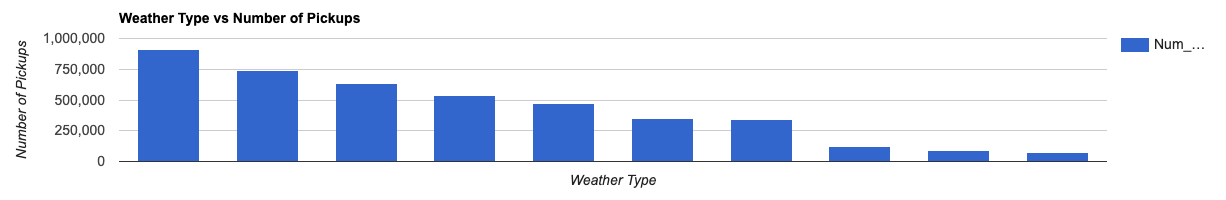

In [5]:
%%chart columns --data WeatherTypeVSPickups
title: Weather Type vs Number of Pickups
vAxis:
  title: Number of Pickups
hAxis:
  title: Weather Type

Given the result, we found that under these weather conditions: broken clouds, scattered clouds, and mist, they have the highest number of pickup requests. This finding contradicts what we have assumed initially, we made an assumption that there would be more pickup requests under bad weather conditions. It is possible that during bad weather, people tend to stay at home; however, during clear days, more people plan to go out which leads to a larger number of Uber trip requests.

### Number 12: Number of Uber Pickup Requests in Top 3 Busiest Months Under Different Weather Condition

In [33]:
%%bq query
SELECT A.the_day, B.the_weekday, A.Num_Of_Pickups, A.WeatherType
FROM
  (SELECT
       extract(date FROM Date_time) AS the_day,
       count(*) AS Num_Of_Pickups,
       WeatherType
    FROM
      `team-3-249220.team3.All_Weather_Pickups`
    WHERE Date_time BETWEEN '2014-07-01' AND '2014-09-30'
    GROUP BY  the_day, WeatherType
    ORDER BY Num_Of_Pickups DESC
    LIMIT 15) AS A
LEFT JOIN
  (SELECT distinct(extract(date from Date_time)) as the_day,extract(dayofweek from Date_time) as the_weekday
    FROM `team-3-249220.team3.All_Weather_Pickups`
    WHERE Date_time between '2014-07-01' and '2014-09-30') B
    ON A.the_day = B.the_day

the_day,the_weekday,Num_Of_Pickups,WeatherType
2014-09-27,7,24445,sky is clear
2014-09-18,5,22855,scattered clouds
2014-08-06,4,22425,broken clouds
2014-09-17,4,22164,scattered clouds
2014-09-03,4,22055,broken clouds
2014-07-10,5,21008,broken clouds
2014-09-25,5,20797,mist
2014-09-12,6,19963,scattered clouds
2014-08-29,6,19781,light rain
2014-07-24,5,19491,broken clouds


*Note*: 1 = Sunday, 2 = Monday, 3 = Tuesday, 4 = Wednesday, 5 = Thursday, 6 = Friday, 7 = Saturday

The table above shows the number of Uber trip requests under different weather conditions in the top 3 busiest months: July, August, September. This table includes variables such as date, weekday, number of pickups, and weather types. From this result, we learned that people tend to request more Uber trips under the following weather conditions: clear sky, broken clouds, and scattered clouds. In addition, more trips are requested on Wednesday, Thursday and Saturday. 

### Number 13:  Hourly Uber PickUps Under Different Weather Conditions

In [23]:
%%bq query
SELECT A.number as Pickups, B.number as Hours_WeatherType, ROUND(A.number/B.number, 2) as pickPerhourWeather , A.WeatherType from (SELECT
   count(*) as number, WeatherType
FROM
  `team-3-249220.team3.All_Weather_Pickups` 
WHERE EXTRACT(Month FROM Date_Time) in (4,5,6,7,8,9) and WeatherType is not null
GROUP BY WeatherType
ORDER BY number DESC) as A
left join(
SELECT
   distinct(Newyork) as weather,count(*)as number
FROM
  `team-3-249220.team3.2014NewYorkCityWeather` 
WHERE EXTRACT(Month FROM datetime) in (4,5,6,7,8,9)
GROUP BY weather
ORDER BY number DESC) as B
on A.WeatherType = B.weather
ORDER BY pickPerhourWeather desc
LIMIT 10

Pickups,Hours_WeatherType,pickPerhourWeather,WeatherType
6779,3,2259.67,thunderstorm with light rain
6840,4,1710.0,drizzle
21309,15,1420.6,proximity thunderstorm
33395,24,1391.46,light intensity drizzle
121410,90,1349.0,haze
64229,55,1167.8,heavy intensity rain
21055,19,1108.16,dust
737083,675,1091.97,scattered clouds
7547,7,1078.14,very heavy rain
910027,858,1060.64,broken clouds


In order to collect more accurate Uber pickup data under different weather conditions, we reached a decision to use the number of pickups under each weather type divided by the total hours of each weather type which gives us the number of pickups per hour under each weather condition. With the given result, we concluded that heavy weather is one of the factors that affect Uber's trip requests.

### Number 14: Weather Condition vs PickUp Per Hour

In [7]:
%%bq query -n pieWeather
SELECT ROUND(A.number/B.number, 2) as pickPerhourWeather , A.WeatherType from (SELECT
   count(*) as number, WeatherType
FROM
  `team-3-249220.team3.All_Weather_Pickups` 
WHERE EXTRACT(Month FROM Date_Time) in (4,5,6,7,8,9) and WeatherType is not null
GROUP BY WeatherType
ORDER BY number DESC) as A
left join(
SELECT
   distinct(Newyork) as weather,count(*)as number
FROM
  `team-3-249220.team3.2014NewYorkCityWeather` 
WHERE EXTRACT(Month FROM datetime) in (4,5,6,7,8,9)
GROUP BY weather
ORDER BY number DESC) as B
on A.WeatherType = B.weather
ORDER BY pickPerhourWeather desc

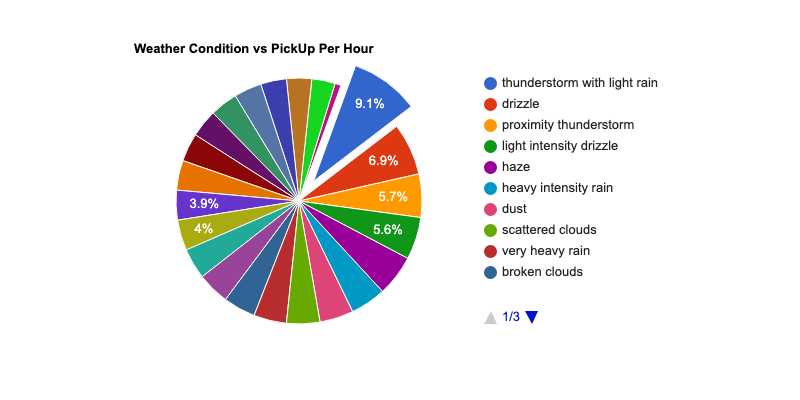

In [8]:
%%chart pie --fields WeatherType,pickPerhourWeather --data pieWeather
title: Weather Condition vs PickUp Per Hour
height: 400
width: 800
pieStartAngle: 20
slices:
  0:
    offset: .2

Based on the above pie chart, we found that 9.1% of the Uber trips were requested during thunderstrom with light rain. 